In [2]:
import pandas as pd 
import numpy as np 

file=pd.read_csv('listings_summary.csv')
df = pd.DataFrame(file)
file2=pd.read_csv('listings.csv')
df2 = pd.DataFrame(file2)

print(df.shape)
print(df.info())
print(df2['price'])

(22552, 96)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 96 columns):
id                                  22552 non-null int64
listing_url                         22552 non-null object
scrape_id                           22552 non-null int64
last_scraped                        22552 non-null object
name                                22493 non-null object
summary                             21589 non-null object
space                               14020 non-null object
description                         22349 non-null object
experiences_offered                 22552 non-null object
neighborhood_overview               11540 non-null object
notes                               7215 non-null object
transit                             13036 non-null object
access                              10837 non-null object
interaction                         10406 non-null object
house_rules                         11449 non-null object
thumbnail_ur

In [3]:
print(df['cleaning_fee'])
#print(df['security_deposit'])
#df['cleaning_fee']= df['cleaning_fee'].fillna(method='ffill',limit=1,inplace=False) #df['cleaning_fee'].median())
df['cleaning_fee'] = df['cleaning_fee'].apply(lambda x:str(x).strip('$'))
#df['cleaning_fee'] = df['cleaning_fee'].apply(lambda x:str(x).replace(',',''))
#df['cleaning_fee'] = df['cleaning_fee'].apply(lambda x:str(x).strip('$'))
#df['cleaning_fee']= df['cleaning_fee'].fillna(df['cleaning_fee'].median()) #fillna(df_ls['cleaning_fee'].mean())

df['square_feet'] = df['square_feet'].fillna(df['square_feet'].median())


#print(df['security_deposit'])
df['security_deposit']=df['security_deposit'].ffill(inplace=False)
#df['cleaning_fee'] = df['cleaning_fee'].apply(lambda x:str(x).strip('$'))
#df['cleaning_fee'] = df['cleaning_fee'].apply(lambda x:str(x).replace(',',''))
#df2['security_deposit'] = list(map(lambda x: float(str(x).replace(',','').replace('$','')),df2['security_deposit']))
 
#fillna(df_ls['security_deposit'].mean()) #ffill(inplace=False)
#print(df_ls['security_deposit'])
df['security_deposit'] = df['security_deposit'].apply(lambda x:str(x).replace(',','').replace('$',''))
#print(df['cleaning_fee'])
print(df['security_deposit'])

0         $30.00
1          $0.00
2         $50.00
3         $30.00
4          $0.00
5         $80.00
6          $0.00
7            NaN
8         $50.00
9         $18.00
10        $50.00
11        $49.00
12        $40.00
13        $50.00
14        $40.00
15        $50.00
16        $35.00
17        $55.00
18        $50.00
19           NaN
20        $50.00
21        $30.00
22        $80.00
23        $40.00
24        $15.00
25        $20.00
26        $50.00
27         $5.00
28         $0.00
29        $30.00
          ...   
22522     $30.00
22523     $30.00
22524     $25.00
22525        NaN
22526      $0.00
22527     $49.00
22528        NaN
22529        NaN
22530     $60.00
22531        NaN
22532    $299.00
22533        NaN
22534        NaN
22535        NaN
22536        NaN
22537        NaN
22538        NaN
22539        NaN
22540        NaN
22541      $0.00
22542        NaN
22543        NaN
22544     $20.00
22545     $10.00
22546    $100.00
22547        NaN
22548      $0.00
22549        N

In [4]:
from geopy.distance import great_circle
def distance_from_berlin(lat, lon):
    berlin_centre = (52.5027778, 13.404166666666667)
    record = (lat, lon)
    return great_circle(berlin_centre, record).km
df['distance'] = df.apply(lambda x: distance_from_berlin(x.latitude, x.longitude), axis=1)
print(df['distance'])

0        3.533182
1        5.085573
2        3.695677
3        3.755285
4        4.550423
5        3.458693
6        5.012297
7        3.733805
8        2.105810
9        2.982036
10       1.444782
11       3.807207
12       2.061292
13       1.868255
14       3.511787
15       2.200622
16       3.254164
17       3.226366
18       4.735999
19       4.886509
20       4.605567
21       2.782500
22       4.538184
23       4.957658
24       4.650043
25       3.801148
26       5.266471
27       7.159022
28       2.861256
29       3.941158
           ...   
22522    5.124360
22523    5.926380
22524    1.140742
22525    7.727114
22526    4.139684
22527    4.133730
22528    1.988263
22529    3.763600
22530    3.025901
22531    2.343168
22532    6.408690
22533    4.255126
22534    7.522113
22535    7.523551
22536    3.799491
22537    7.493571
22538    1.307927
22539    8.895305
22540    4.110236
22541    4.086769
22542    6.539190
22543    4.519921
22544    3.847479
22545    2.874725
22546    3

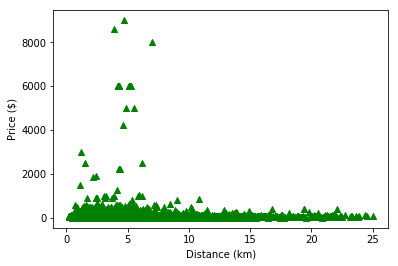

In [5]:
import matplotlib.pyplot as plt 

plt.scatter(df['distance'],df2['price'],marker='^',color='green')
plt.xlabel('Distance (km)')
plt.ylabel('Price ($)')
plt.show()
plt.close()

In [4]:
df['neighbourhood'] = df['neighbourhood'].ffill(inplace=False)
df['accommodates'] = df['accommodates'].ffill(inplace=False)
df['bathrooms'] = df['bathrooms'].ffill(inplace=False)
df['bedrooms'] = df['bedrooms'].ffill(inplace=False)
df['security_deposit'] = df['security_deposit'].ffill(inplace=False)
df['cleaning_fee'] = df['cleaning_fee'].ffill(inplace=False)
df['host_is_superhost']=df['host_is_superhost'].ffill(inplace=False)
df['review_scores_rating']=df['review_scores_rating'].ffill(inplace=False)
df['cleaning_fee'] = df['cleaning_fee'].ffill(inplace=False)
df['review_scores_cleanliness']= df['review_scores_cleanliness'].ffill(inplace=False)
df['review_scores_accuracy']=df['review_scores_accuracy'].ffill(inplace=False)
df['review_scores_checkin'] = df['review_scores_checkin'].ffill(inplace=False)

from sklearn.preprocessing import LabelEncoder,Imputer

#print('Label Encoding')
le = LabelEncoder()
df['neighbourhood'] = le.fit_transform(df['neighbourhood'])
df['property_type']= le.fit_transform(df['property_type'])
df['room_type'] = le.fit_transform(df['room_type'])
df['bed_type'] = le.fit_transform(df['bed_type'])
df['has_availability']=le.fit_transform(df['has_availability'])
df['instant_bookable']= le.fit_transform(df['instant_bookable'])
df['host_is_superhost'] = le.fit_transform(df['host_is_superhost'])
df['is_business_travel_ready']=le.fit_transform(df['is_business_travel_ready'])
df['cancellation_policy'] = le.fit_transform(df['cancellation_policy'])
df['neighbourhood_cleansed'] = le.fit_transform(df['neighbourhood_cleansed'])
df['neighbourhood_group_cleansed'] = le.fit_transform(df['neighbourhood_group_cleansed'])
df['is_location_exact']=le.fit_transform(df['is_location_exact'])
df['host_is_superhost'] = le.fit_transform(df['host_is_superhost'])
#print(df['is_business_travel_ready'])
#print(df['is_business_travel_ready'].isnull().sum())


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 97 columns):
id                                  22552 non-null int64
listing_url                         22552 non-null object
scrape_id                           22552 non-null int64
last_scraped                        22552 non-null object
name                                22493 non-null object
summary                             21589 non-null object
space                               14020 non-null object
description                         22349 non-null object
experiences_offered                 22552 non-null object
neighborhood_overview               11540 non-null object
notes                               7215 non-null object
transit                             13036 non-null object
access                              10837 non-null object
interaction                         10406 non-null object
house_rules                         11449 non-null object
thumbnail_url           

In [18]:
from sklearn.feature_selection import SelectKBest, chi2
X = df[['neighbourhood','accommodates','distance','property_type','room_type','bathrooms','minimum_nights','security_deposit',
           'bedrooms','bed_type','number_of_reviews','has_availability','guests_included','calculated_host_listings_count',
           'instant_bookable','latitude','longitude','host_is_superhost','square_feet','review_scores_rating',
           'is_business_travel_ready','cancellation_policy','neighbourhood_cleansed','neighbourhood_group_cleansed',
           'is_location_exact','review_scores_cleanliness','maximum_nights','review_scores_accuracy','review_scores_checkin',
       ]]
Y = df2['price']

bestfeatures = SelectKBest(score_func=chi2,k=29)
features_fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(features_fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(29,'Score'))

                             Specs         Score
26                  maximum_nights  2.152729e+10
6                   minimum_nights  8.856912e+05
7                 security_deposit  7.716334e+05
10               number_of_reviews  8.341015e+04
18                     square_feet  2.982368e+04
3                    property_type  2.222414e+04
13  calculated_host_listings_count  1.072021e+04
22          neighbourhood_cleansed  1.071895e+04
1                     accommodates  7.771539e+03
4                        room_type  4.234147e+03
0                    neighbourhood  3.254091e+03
12                 guests_included  3.061216e+03
8                         bedrooms  2.380380e+03
21             cancellation_policy  1.444670e+03
2                         distance  9.580979e+02
17               host_is_superhost  6.349556e+02
23    neighbourhood_group_cleansed  5.957898e+02
14                instant_bookable  3.502228e+02
5                        bathrooms  3.290317e+02
19            review

In [15]:
X5 = df[['maximum_nights','minimum_nights','number_of_reviews','security_deposit','property_type']]
Y = df2['price']
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score

X5_train,X5_test,Y5_train,Y5_test = train_test_split(X5,Y,random_state=21,test_size=0.35)
print('Using top 5 features:-')
rf = RandomForestRegressor(random_state=1,n_estimators=10)
rf.fit(X5_train,Y5_train)
rf_pred_5 = rf.predict(X5_test)
r2_rf_5 = r2_score(Y5_test,rf_pred_5)
adjusted_r2_rf_5 = 1 - (1-r2_rf_5)*(len(Y)-1)/(len(Y)-X5.shape[1]-1)
print('r2 = ', str(r2_rf_5))
print('adjusted_r2 = ' + str(adjusted_r2_rf_5))

Using top 5 features:-
r2 =  0.3444471846584729
adjusted_r2 = 0.3443018034788088


In [9]:
X10 = df[['maximum_nights','minimum_nights','number_of_reviews','security_deposit','square_feet','property_type','calculated_host_listings_count',
         'neighbourhood_cleansed','accommodates','room_type','neighbourhood']]

X10_train,X10_test,Y10_train,Y10_test = train_test_split(X10,Y,random_state=21,test_size=0.35)

rf.fit(X10_train,Y10_train)
rf_pred_10=rf.predict(X10_test)
r2_rf_10 = r2_score(Y10_test,rf_pred_10)
adjusted_r2_rf_10 = 1 - (1-r2_rf_10)*(len(Y)-1)/(len(Y)-X5.shape[1]-1)
print('r2 = ', str(r2_rf_10))
print('adjusted_r2 = ' + str(adjusted_r2_rf_10))

r2 =  0.4842993097549557
adjusted_r2 = 0.48418494341719176


In [10]:
X15 = df[['maximum_nights','minimum_nights','number_of_reviews','security_deposit','square_feet','property_type','calculated_host_listings_count',
         'neighbourhood_cleansed','accommodates','room_type','neighbourhood','guests_included','bedrooms','cancellation_policy',
         'distance','host_is_superhost']]

X15_train,X15_test,Y15_train,Y15_test = train_test_split(X15,Y,random_state=21,test_size=0.35)
rf.fit(X15_train,Y15_train)
rf_pred_15 = rf.predict(X15_test)
r2_rf_15 = r2_score(Y15_test,rf_pred_15)
adjusted_r2_rf_15 = 1 - (1-r2_rf_15)*(len(Y)-1)/(len(Y)-X5.shape[1]-1)
print('r2 = ', str(r2_rf_15))
print('adjusted_r2 = ' + str(adjusted_r2_rf_15))

r2 =  0.4727685494610907
adjusted_r2 = 0.47265162596012844


In [11]:
X20 = df[['maximum_nights','minimum_nights','number_of_reviews','security_deposit','square_feet','property_type','calculated_host_listings_count',
         'neighbourhood_cleansed','accommodates','room_type','neighbourhood','guests_included','bedrooms','cancellation_policy',
         'distance','host_is_superhost','neighbourhood_group_cleansed','instant_bookable','bathrooms','review_scores_rating',
         'review_scores_rating']]
X20_train,X20_test,Y20_train,Y20_test = train_test_split(X20,Y,random_state=21,test_size=0.35)
rf.fit(X20_train,Y20_train)
rf_pred_20 = rf.predict(X20_test)
r2_rf_20 = r2_score(Y20_test,rf_pred_20)
adjusted_r2_rf_20 = 1 - (1-r2_rf_20)*(len(Y)-1)/(len(Y)-X5.shape[1]-1)
print('r2 = ', str(r2_rf_20))
print('adjusted_r2 = ' + str(adjusted_r2_rf_20))

r2 =  0.4660435994617287
adjusted_r2 = 0.4659251845764856


In [19]:
X = df[['neighbourhood','accommodates','distance','property_type','room_type','bathrooms','minimum_nights',
           'bedrooms','bed_type','number_of_reviews','has_availability','guests_included','calculated_host_listings_count',
           'instant_bookable','longitude','host_is_superhost','square_feet','review_scores_rating',
           'cancellation_policy','neighbourhood_cleansed','neighbourhood_group_cleansed',
           'is_location_exact','review_scores_cleanliness','maximum_nights','security_deposit']]
X25_train,X25_test,Y25_train,Y25_test = train_test_split(X,Y,random_state=21,test_size=0.35)
rf.fit(X25_train,Y25_train)
rf_pred_25 = rf.predict(X25_test)
r2_rf_25 = r2_score(Y25_test,rf_pred_25)
adjusted_r2_rf_25 = 1 - (1-r2_rf_25)*(len(Y)-1)/(len(Y)-X5.shape[1]-1)
print('r2 = ', str(r2_rf_25))
print('adjusted_r2 = ' + str(adjusted_r2_rf_25))


r2 =  0.4478017016957777
adjusted_r2 = 0.44767924132624337


<Figure size 432x288 with 0 Axes>

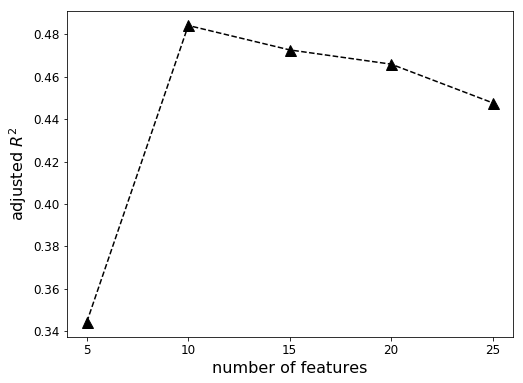

In [24]:
Num_Param  = [5,10,15,20,25]      
Adjusted_R2=[adjusted_r2_rf_5,adjusted_r2_rf_10,adjusted_r2_rf_15,adjusted_r2_rf_20,adjusted_r2_rf_25]
#0.16678405798010365,0.46730878573311485,0.4816257423635494,0.4696216566477557,0.43976107546852117]

import matplotlib.pyplot as plt 
plt.tight_layout()
plt.figure(figsize=(8,6))
plt.plot(Num_Param,Adjusted_R2,marker='^',linestyle='--',color='black',markersize=11)
plt.xlabel('number of features',fontsize=16)
plt.xticks([5,10,15,20,25],fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('adjusted $R^2$',fontsize=16)
plt.savefig('Parameter-vs-AdjR2.png')
plt.show()
plt.close()
